# Exercises from Linear Algebra for DS

In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
import scipy
import pandas as pd

pio.renderers.default='iframe'
#plt.figure(figsize=(12, 12), dpi=80)
plt.rcParams["figure.figsize"] = (7,7)

In [3]:
#function to create nd vectors in (0, 10, 0, 10)
def vec(dim=2):
    return np.random.rand(dim)*10

# function to create row-vectors
def row(dim=2):
    return np.array([vec(dim=2)])

## Chapter 6

### Exercise 6.1

Calculate frobenius norm

In [5]:
def frobenius_norm(A):
    return np.sum(A**2)**0.5

<AxesSubplot:>

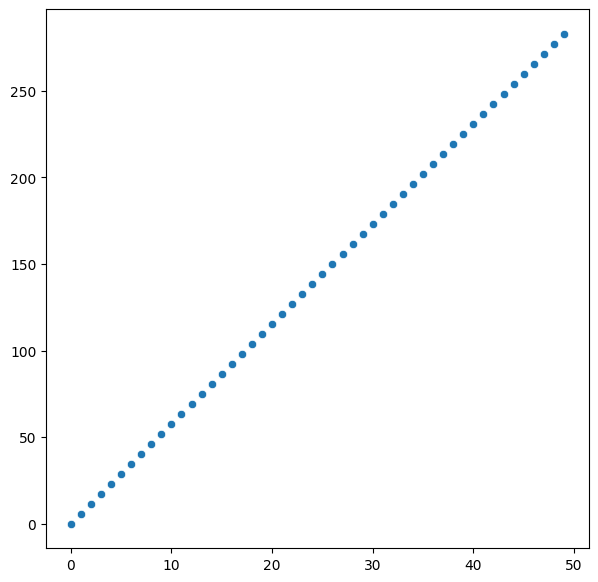

In [6]:
matrix = []

for x in np.arange(10):
    A = np.random.rand(10,10)
    matrix.append([frobenius_norm(A*x) for x in np.arange(50)])

mean_norms = np.mean(matrix, axis=0)

sns.scatterplot(x=np.arange(50), y=mean_norms)

# I think I might be misunderstanding the exercise, because I have completely different picture

### Exercise 6.2

frobenius distance

In [7]:
def frobenius_distance(X, Y):
    return frobenius_norm(X-Y)

Frobenius distance between X,Y is 0.6289230846648184, number of iterations is 6


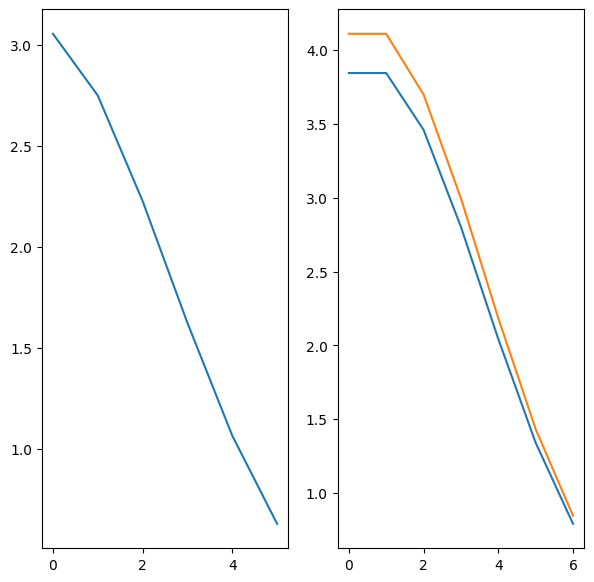

In [8]:
X = np.random.rand(7,7)
Y = np.random.rand(7,7)

xfn = [frobenius_norm(X)]
yfn = [frobenius_norm(Y)]

fd = []

s = 1

while frobenius_distance(X,Y) > 1:
    X = X * s
    Y = Y * s
    
    s *= 0.9
    
    xfn.append(frobenius_norm(X))
    yfn.append(frobenius_norm(Y))
    
    fd.append(frobenius_distance(X,Y))
    
print(f'Frobenius distance between X,Y is {frobenius_distance(X,Y)}, number of iterations is {round(math.log(s, 0.9))}')

fig, (ax1, ax2) = plt.subplots(1,2)

ax1.plot(fd)

ax2.plot(xfn)
ax2.plot(yfn)

### Exercise 6.3

Trace of matrix

In [9]:
A = np.round(np.random.rand(10,10)*10)

In [10]:
frobenius_norm(A) == np.trace(A.T @ A)**0.5 # > True

True

In [11]:
frobenius_norm(A) == np.trace(A @ A.T)**0.5 # > True

True

### Exercise 6.4

In [15]:
A = np.random.rand(10,10)
n = frobenius_norm(A)

In [16]:
I = np.eye(10)

In [53]:
shifts = [A+n*(x/30)*I for x in range(0,31)]

In [54]:
fns = [frobenius_norm(X) for X in shifts] # frobenius norms

In [55]:
fds = [frobenius_distance(A, X) for X in shifts] # frobenius distances

In [56]:
cc = [np.corrcoef(A.flatten(), X.flatten())[0,1] for X in shifts] # correlation coefficients

In [57]:
data = pd.DataFrame({'shift': list(range(0,31)), 'frob_norm': fns, 'frob_distance': fds, 'corr_coef': cc})
data.head()

,shift,frob_norm,frob_distance,corr_coef
0,0,5.392540,0.000000,1.000000
1,1,5.534588,0.568424,0.981843
2,2,5.729752,1.136847,0.929432
3,3,5.972827,1.705271,0.852824
4,4,6.258232,2.273695,0.765657


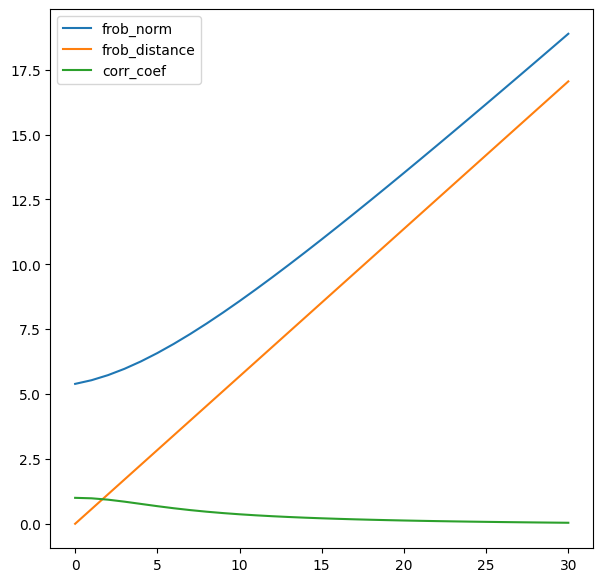

In [69]:
plt.plot(data.frob_norm, label='frob_norm')
plt.plot(data.frob_distance, label='frob_distance')
plt.plot(data.corr_coef, label='corr_coef')

plt.legend(loc="upper left")